In [18]:
# is this the folder with the script in it?
scriptDir<-getwd()
scriptDir

# if not, uncomment and use this instead
# scriptDir<-""

[1] "/Users/anyaemerson/Documents/github/emersonae/SensorDataProcessing/rriv_methane/anya_methane"

In [21]:
methaneFunctions<-paste(scriptDir,"/methane_functions.r",sep="")
methaneFunctions
if (file.exists(methaneFunctions)){
    source(methaneFunctions)
} else {
    print("manually correct the location and/or name of methane_functions.r")
}

[1] "/Users/anyaemerson/Documents/github/emersonae/SensorDataProcessing/rriv_methane/anya_methane/methane_functions.r"

In [12]:
# Package names
packages <- c("tidyverse","dplyr", "doBy", "lubridate", "ggplot2", "Hmisc", "zoo", "viridis", "gam", "ggeffects", "reshape2", "mgcv")
packageHandler(packages)

ERROR: Error in packageHandler(packages): could not find function "packageHandler"


In [13]:
#CAL1 is comparison
#CAL4 is in bucket with LGR 
#RRIV compare 1: small bucket
directory1<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230626-leak-test/RRIV"
#RRIV compare 2: small bucket
directory2<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230627-leak-test/RRIV"
#RRIV compare 3: 5 gallon bucket
directory3 <-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230628-leak-test/RRIV"


#LGR test 1 : 5 gallon bucket w/ small tubing 
directory4<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230626-leak-test/LGR"
#LGR test 2 : smaller bucket w/ old tubing 
directory5<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230627-leak-test-2/LGR"
#LGR test 3: 5 gallon bucket small tubing 
directory6 <-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230628-leak-test/LGR"


In [14]:
# create output directory path based on input directory
outputDir<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230626-leak-test/output"
# create the output directory if necessary
newDir(dirPath = outputDir)

ERROR: Error in newDir(dirPath = outputDir): could not find function "newDir"


In [15]:
UUIDdict=c(
"57FF6E068387575148360767"="CAL1",
"57FF6D068387575151290167"="CAL2",
"57FF6F068387575149330867"="CAL3",
"57FF6E068387575140070767"="CAL4",
"50FF74068678545256252467"="CAL5")

rriv_data1<-concat_dirs(directory1, read_rriv_CSV, filePattern=".CSV", minFileSize=400)
rriv_data1<-process_rriv_columns(rriv_data1)
rriv_data1<-createSensorColFromIDs(rriv_data1,idCol = "uuid",dict = UUIDdict)
saveDFcsv(rriv_data1)

rriv_data2<-concat_dirs(directory2, read_rriv_CSV, filePattern=".CSV", minFileSize=400)
rriv_data2<-process_rriv_columns(rriv_data2)
rriv_data2<-createSensorColFromIDs(rriv_data2,idCol = "uuid",dict = UUIDdict)
saveDFcsv(rriv_data2)

rriv_data3<-concat_dirs(directory3, read_rriv_CSV, filePattern=".CSV", minFileSize=400)
rriv_data3<-process_rriv_columns(rriv_data3)
rriv_data3<-createSensorColFromIDs(rriv_data3,idCol = "uuid",dict = UUIDdict)
saveDFcsv(rriv_data3)


ERROR: Error in concat_dirs(directory1, read_rriv_CSV, filePattern = ".CSV", : could not find function "concat_dirs"


In [149]:
# head (rriv_data1)
# head (rriv_data2)
# head (rriv_data3)

In [17]:
lgr_data1<-concat_dirs(directory4, read_GA_ZIP, filePattern=".zip", minFileSize=400)
    clean_temp()
lgr_data1$Time<-lubridate::as_datetime(lgr_data1$Time)
saveDFcsv(lgr_data1)

lgr_data2<-concat_dirs(directory5, read_GA_ZIP, filePattern=".zip", minFileSize=400)
    clean_temp()
lgr_data2$Time<-lubridate::as_datetime(lgr_data2$Time)
saveDFcsv(lgr_data2)

lgr_data3<-concat_dirs(directory6, read_GA_ZIP, filePattern=".zip", minFileSize=400)
    clean_temp()
lgr_data3$Time<-lubridate::as_datetime(lgr_data3$Time)
saveDFcsv(lgr_data3)

ERROR: Error in concat_dirs(directory4, read_GA_ZIP, filePattern = ".zip", minFileSize = 400): could not find function "concat_dirs"


In [151]:
# head (lgr_data1)
# head (lgr_data2)
# head (lgr_data3)

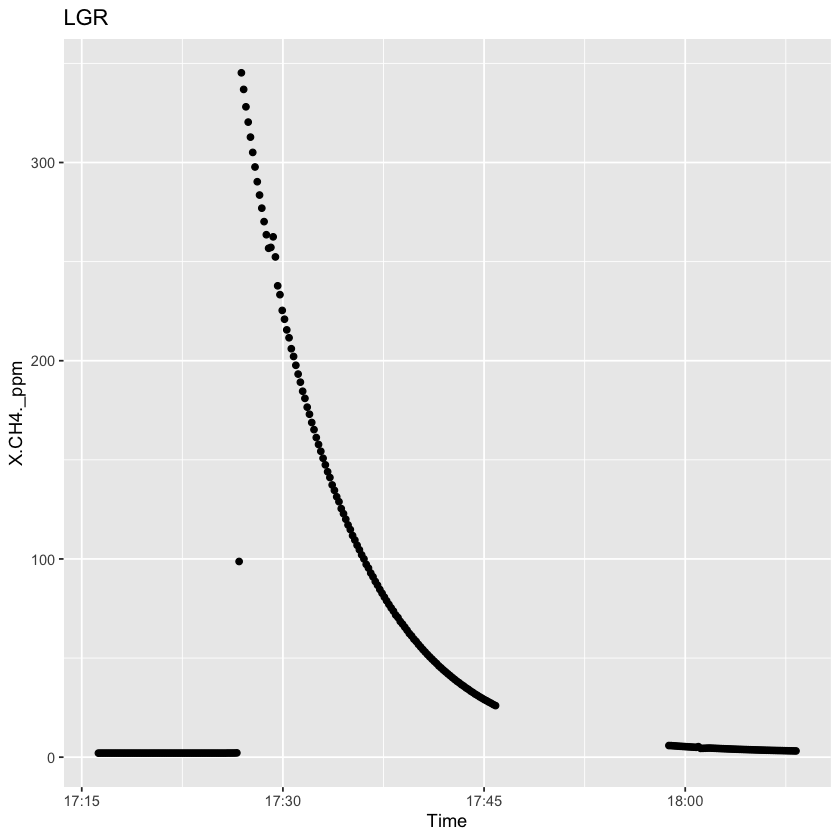

In [26]:
lgr_all<-rbind(lgr_data1,lgr_data2)
ggplot(lgr_all, aes(x=Time, y=X.CH4._ppm))+geom_point()+labs(title="LGR")

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'X.CH4._ppm' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_han

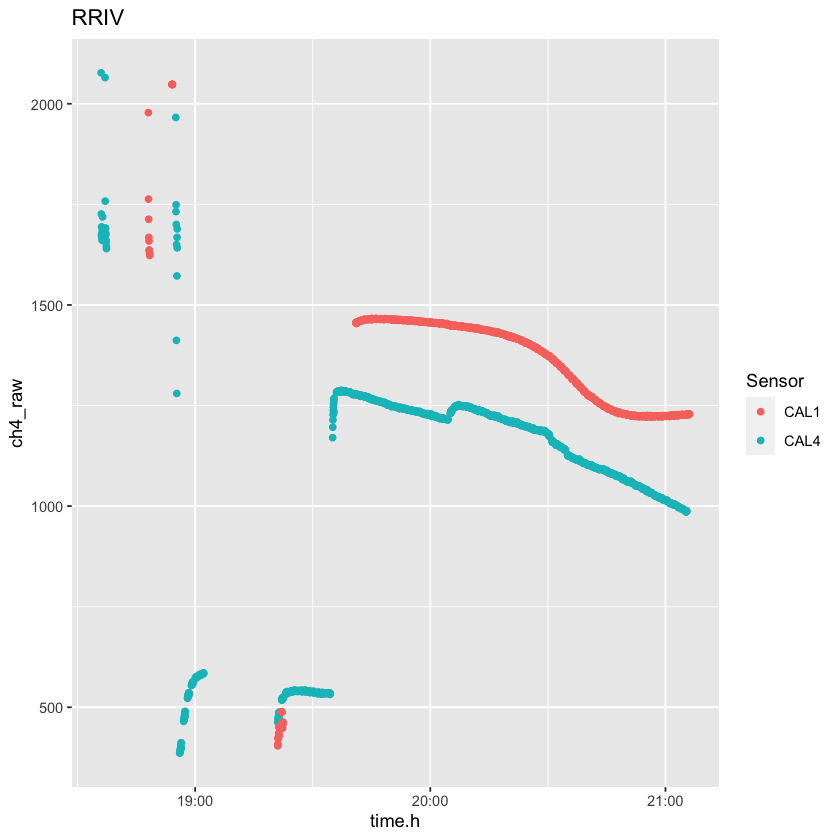

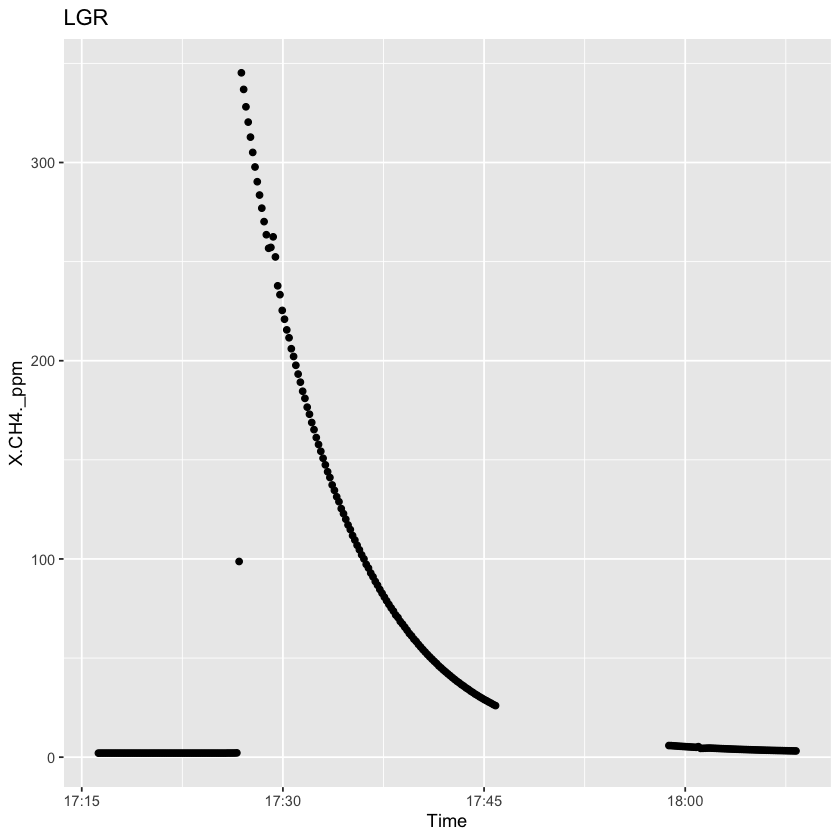

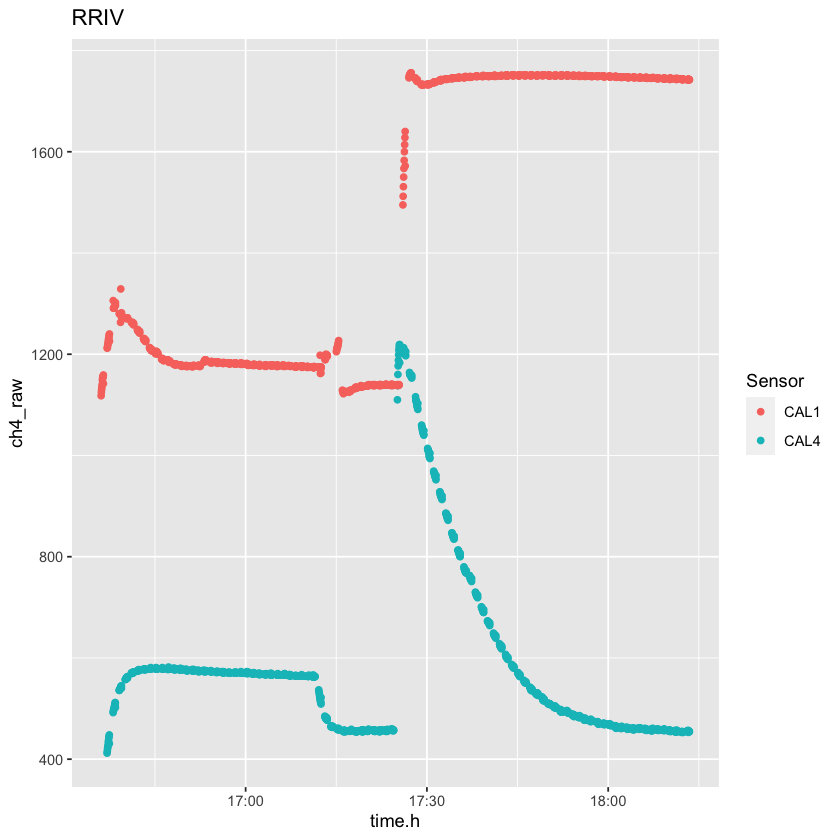

In [27]:
ggplot(lgr_data1, aes(x=Time, y=X.CH4._ppm))+geom_point()+labs(title="LGR")
ggplot(rriv_data1, aes(x=time.h, y=ch4_raw, color=Sensor))+geom_point()+labs(title="RRIV")

ggplot(lgr_data2, aes(x=Time, y=X.CH4._ppm))+geom_point()+labs(title="LGR")
ggplot(rriv_data2, aes(x=time.h, y=ch4_raw, color=Sensor))+geom_point()+labs(title="RRIV")


## clean data

In [28]:
# start time is the max between the starting points for each range
# start<-max(range(rriv_data1$time.h,na.rm=TRUE)[1],range(lgr_data1$Time,na.rm=TRUE)[1])
start<-max(range(rriv_data1$time.h)[1],range(lgr_data1$Time)[1])
# end time is the min between the ending points for each range
# end<-min(range(rriv_data1$time.h,na.rm=TRUE)[2],range(lgr_data1$Time,na.rm=TRUE)[2])
end<-min(range(rriv_data1$time.h)[2],range(lgr_data1$Time)[2])

# subset the rriv data
rriv_data_overlap1<-rriv_data1[rriv_data1$time.h>start & rriv_data1$time.h<end,]
# range(rriv_data_overlap1$time.h,na.rm=TRUE)
range(rriv_data_overlap1$time.h)

# subset the lgr data
lgr_data_overlap1<-lgr_data1[lgr_data1$Time>start & lgr_data1$Time<end,]
# range(lgr_data_overlap1$Time,na.rm=TRUE)
range(lgr_data_overlap1$Time)

rriv_data_ol_raw1<-rriv_data_overlap1[rriv_data_overlap1$type=="raw",]
rriv_data_ol_summary1<-rriv_data_overlap1[rriv_data_overlap1$type=="summary",]


Warning message in min.default(structure(numeric(0), class = c("POSIXct", "POSIXt":
“no non-missing arguments to min; returning Inf”
Warning message in max.default(structure(numeric(0), class = c("POSIXct", "POSIXt":
“no non-missing arguments to max; returning -Inf”
Warning message in min.default(structure(numeric(0), class = c("POSIXct", "POSIXt":
“no non-missing arguments to min; returning Inf”
Warning message in max.default(structure(numeric(0), class = c("POSIXct", "POSIXt":
“no non-missing arguments to max; returning -Inf”
Warning message in min.default(structure(numeric(0), class = c("POSIXct", "POSIXt":
“no non-missing arguments to min; returning Inf”
Warning message in max.default(structure(numeric(0), class = c("POSIXct", "POSIXt":
“no non-missing arguments to max; returning -Inf”


[1] "Inf"  "-Inf"

Warning message in min.default(structure(numeric(0), class = c("POSIXct", "POSIXt":
“no non-missing arguments to min; returning Inf”
Warning message in max.default(structure(numeric(0), class = c("POSIXct", "POSIXt":
“no non-missing arguments to max; returning -Inf”


[1] "Inf"  "-Inf"

In [12]:
# start time is the max between the starting points for each range
# start<-max(range(rriv_data2$time.h,na.rm=TRUE)[1],range(lgr_data2$Time,na.rm=TRUE)[1])
start<-max(range(rriv_data2$time.h)[1],range(lgr_data2$Time)[1])
# end time is the min between the ending points for each range
# end<-min(range(rriv_data2$time.h,na.rm=TRUE)[2],range(lgr_data2$Time,na.rm=TRUE)[2])
end<-min(range(rriv_data2$time.h)[2],range(lgr_data2$Time)[2])

# subset the rriv data
rriv_data_overlap2<-rriv_data2[rriv_data2$time.h>start & rriv_data2$time.h<end,]
# range(rriv_data_overlap2$time.h,na.rm=TRUE)
range(rriv_data_overlap2$time.h)

# subset the lgr data
lgr_data_overlap2<-lgr_data2[lgr_data2$Time>start & lgr_data2$Time<end,]
# range(lgr_data_overlap2$Time,na.rm=TRUE)
range(lgr_data_overlap2$Time)

rriv_data_ol_raw2<-rriv_data_overlap2[rriv_data_overlap2$type=="raw",]
rriv_data_ol_summary2<-rriv_data_overlap2[rriv_data_overlap2$type=="summary",]

[1] "2023-06-27 17:16:15 UTC" "2023-06-27 18:08:15 UTC"

[1] "2023-06-27 17:16:24 UTC" "2023-06-27 18:08:05 UTC"

### silicone tubing

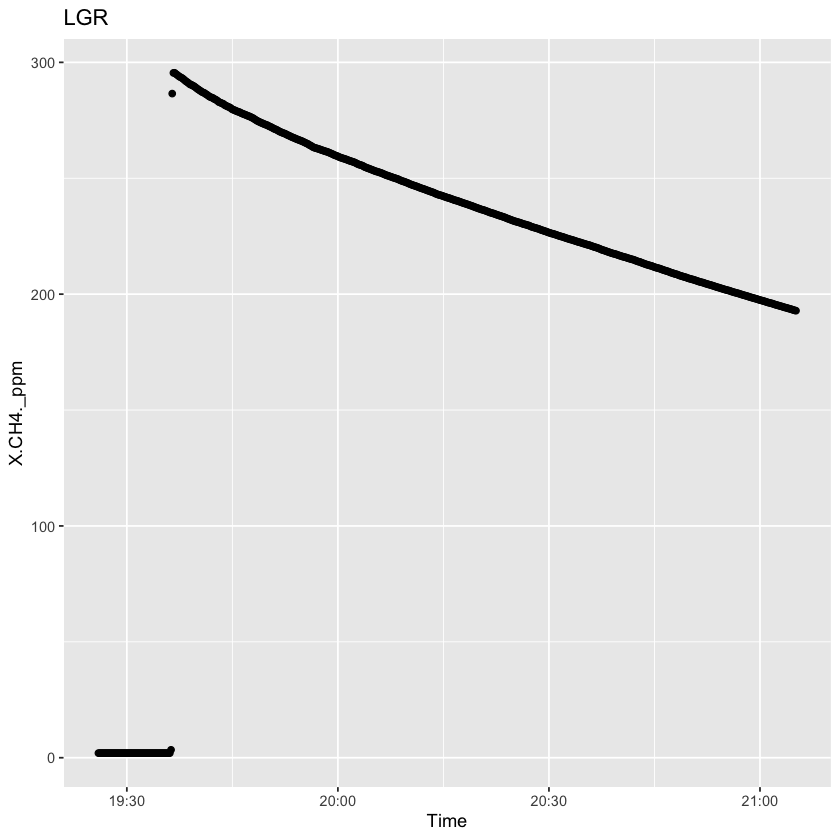

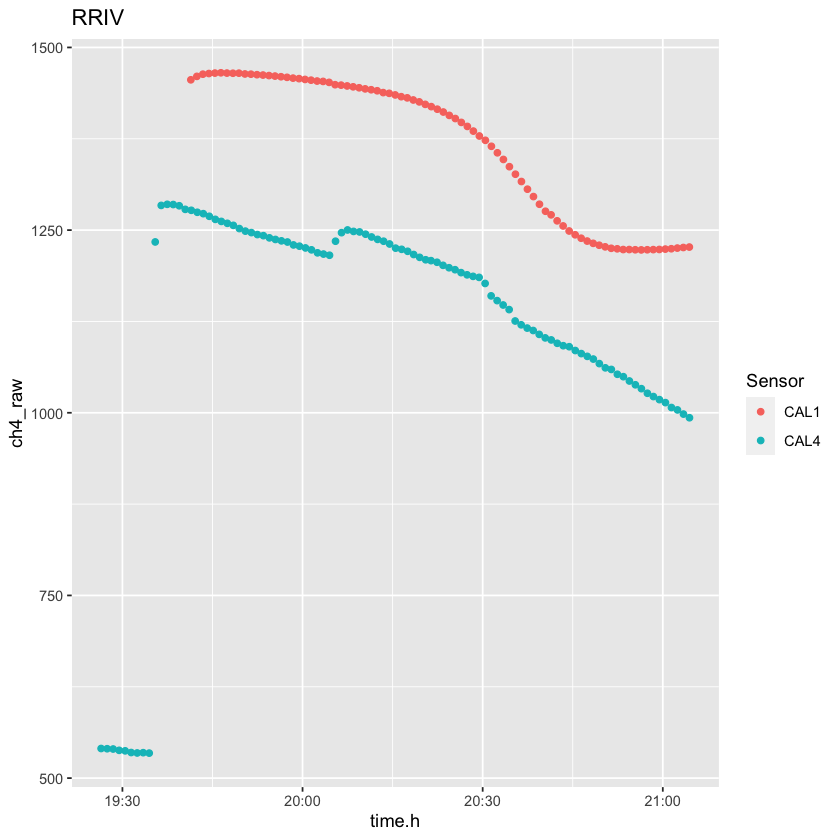

In [110]:
ggplot(lgr_data_overlap1, aes(x=Time, y=X.CH4._ppm))+geom_point()+labs(title="LGR-small-tubing")
ggplot(rriv_data_ol_summary1, aes(x=time.h, y=ch4_raw, color=Sensor))+geom_point()+labs(title="RRIV")


### old tubing w/o parafin

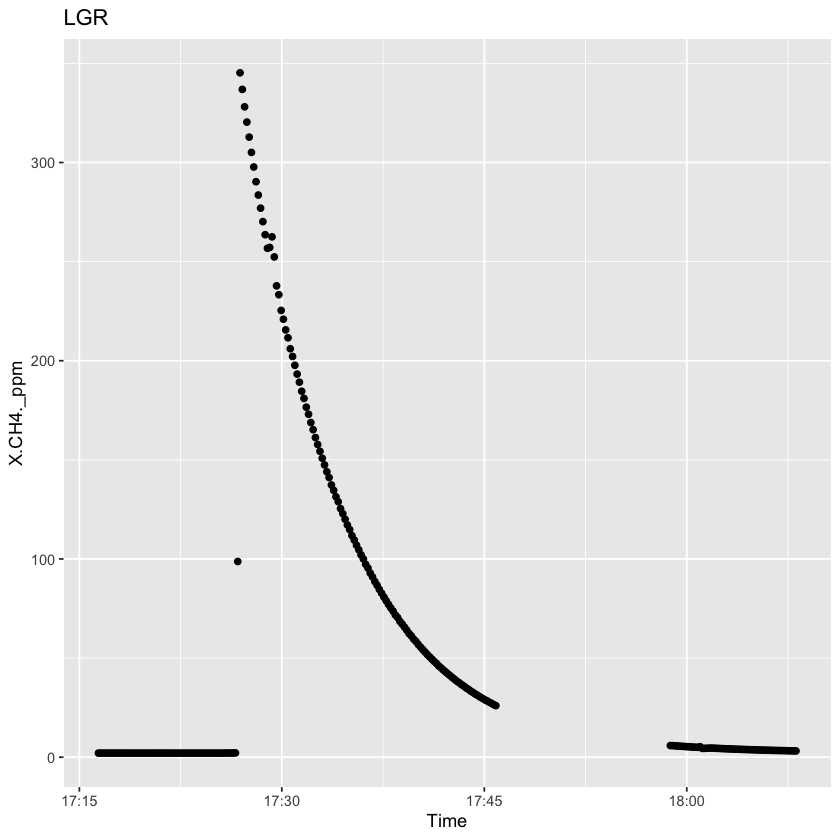

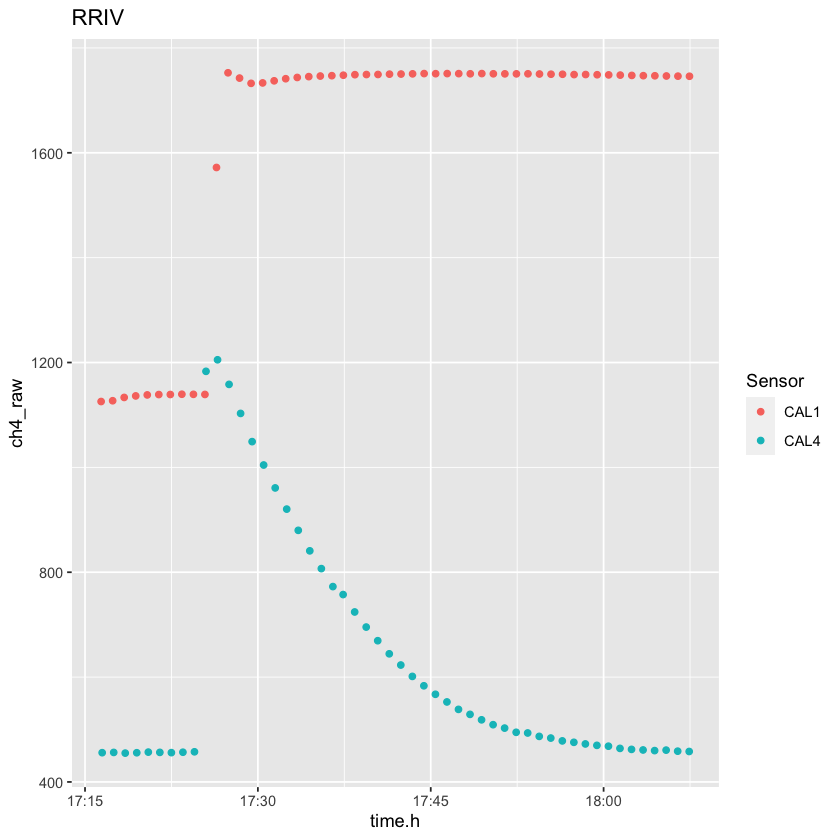

In [22]:
ggplot(lgr_data_overlap2, aes(x=Time, y=X.CH4._ppm))+geom_point()+labs(title="LGR")
ggplot(rriv_data_ol_summary2, aes(x=time.h, y=ch4_raw, color=Sensor))+geom_point()+labs(title="RRIV")
